## Applying Different Wrapper methods to optimize our model.

- Given a feature set and a model, we want to distinguish between important and unimportant features
- Or even important combinations of features.

### Loading the Dataset

In [363]:
import pandas as pd

X = pd.read_excel("./Datasets/Filtered_features.xlsx")

print(X.head())

   Gender  Senior Citizen  Partner  Dependents  Multiple Lines  \
0       1               0        0           0               0   
1       0               0        0           1               0   
2       0               0        0           1               1   
3       0               0        1           1               1   
4       1               0        0           1               1   

   Online Security  Online Backup  Device Protection  Tech Support  \
0                1              1                  0             0   
1                0              0                  0             0   
2                0              0                  1             0   
3                0              0                  1             1   
4                0              1                  1             0   

   Streaming TV  ...      CLTV  DSL_Service  month-to-month_contract  \
0             0  ... -0.981675            1                        1   
1             0  ... -1.436462        

Preparing the data by splitting it into Pandas Dataframe (for X) and Pandas Series (for y)

In [364]:
y = X["Churn Value"]
X = X.drop(columns=["Churn Value"])

### Before using a Wrapper method, we need to specify a machine learning model
- We Will use our Logistic Regression Model

In [365]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)
print(model.score(X, y))

0.8034698521046644


## Sequential Forward Floating Selection


In [366]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# set up SFS Params
sffs = SFS(model,
           k_features=18,
           forward=True,
           floating=True,
           scoring="accuracy",
           cv=0)
sffs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, k_features=(18, 18),
                          scoring='accuracy')

('Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Online Security', 'Online Backup', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'CLTV', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'mailed-check_paymentmethod')
0.8058873720136519


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


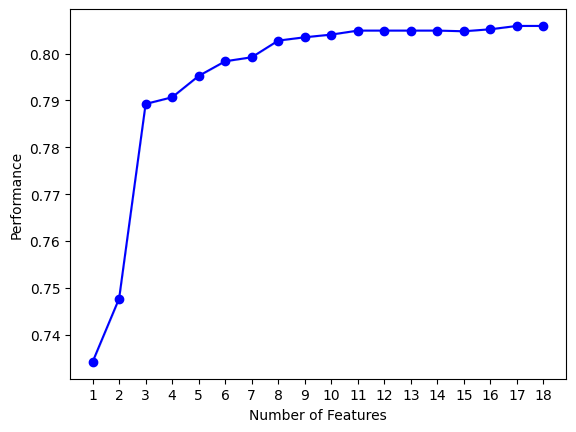

In [367]:
# print the tuple of features which were chosen
print(sffs.subsets_[18]["feature_names"])
# print the score of the model with selected features
print(sffs.subsets_[18]["avg_score"])
# plot the accuracy as a function of the number of features
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
plot_sfs(sffs.get_metric_dict())
plt.show()

## Sequential Backward Floating Selection

In [368]:
# set up SFS Params
sbfs = SFS(model,
           k_features=13,
           forward=False,
           floating=False,
           scoring="accuracy",
           cv=0)
sbfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(13, 13),
                          scoring='accuracy')

('Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'CLTV', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod', 'mailed-check_paymentmethod')
0.8034698521046644


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


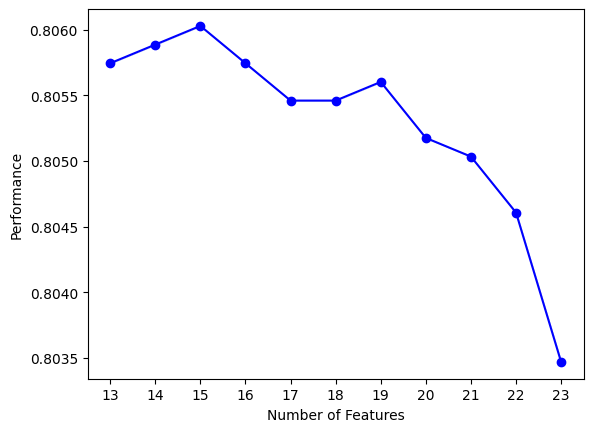

In [369]:
# print the tuple of features which were chosen
print(sbfs.subsets_[23]["feature_names"])
# print the score of the model with selected features
print(sbfs.subsets_[23]["avg_score"])
# plot the accuracy as a function of the number of features
plot_sfs(sbfs.get_metric_dict())
plt.show()

## Recursive Feature Elimination

In [371]:
features_list = ('Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'CLTV', 'DSL_Service', 'month-to-month_contract', 'one-year_contract', 'two-year_contract', 'bank-transfer-auto_paymentmethod', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod', 'mailed-check_paymentmethod')

# use Recursive feature Elimation frmo sklearn
from sklearn.feature_selection import RFE

rfe = RFE(model,
          n_features_to_select=15)
rfe.fit(X,y)

features = [f for (f, support) in zip (features_list, rfe.support_) if support]
print(features)
print(rfe.score(X, y))


['Senior Citizen', 'Partner', 'Dependents', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Paperless Billing', 'Monthly Charges', 'Total Charges', 'DSL_Service', 'month-to-month_contract', 'two-year_contract', 'credit-card-auto_paymentmethod', 'electronic-check_paymentmethod']
0.804749715585893
